<a href="https://colab.research.google.com/github/luismlopes/Complete-Python-3-Bootcamp/blob/master/Copy_of_High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [ ]:
import keras

import numpy as np

import pandas as pd


# A library for data visualization
import matplotlib.pyplot as plt

# An advanced library for data visualization
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler



import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical


**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/MIT-AI course/elective_project/SVHN_single_grey1.h5')



# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

# Close this file

h5f.close()

In [ ]:
X_train[2]

array([[123.125 , 125.8581, 122.0757, ..., 123.5747, 124.1186, 123.3144],
       [121.1683, 124.1294, 117.4613, ..., 115.6078, 119.5751, 122.8306],
       [124.6132, 121.1019, 109.6623, ..., 111.1783, 119.7923, 124.7595],
       ...,
       [135.1391, 127.3679, 117.754 , ...,  95.0919, 105.5917, 114.9283],
       [134.8402, 131.9545, 124.0415, ...,  93.864 , 105.3036, 115.1132],
       [134.8402, 132.0685, 128.34  , ...,  93.9349, 104.7875, 113.8252]],
      dtype=float32)

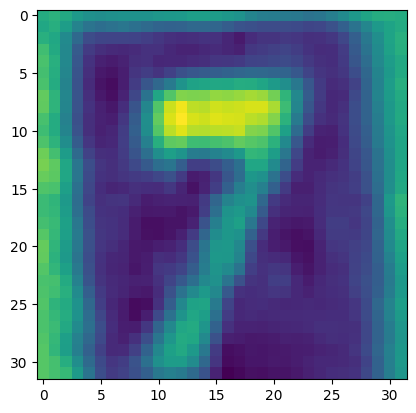

In [ ]:
plt.imshow(X_train[2])


In [ ]:
y_train[2]

7

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

The training data has 42000 images and the testing data 18000 images.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

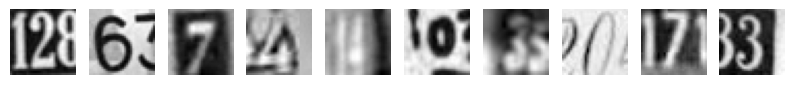

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

Print the shapes of Training and Test data

In [ ]:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Define the model 1

def nn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(64,input_shape=(1024, ), activation = 'relu'))

    model.add(Dense(32, activation = 'relu'))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = Adam(learning_rate=0.001),
                  metrics = ['accuracy'])

    return model

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:

model_1 = nn_model_1()

In [ ]:
history_model_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose = 1)

Epoch 1/20
329/329 [==============================] - 3s 7ms/step - loss: 2.2706 - accuracy: 0.1416 - val_loss: 2.1856 - val_accuracy: 0.1926
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 1.9961 - accuracy: 0.3024 - val_loss: 1.8351 - val_accuracy: 0.3590
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 1.7535 - accuracy: 0.4023 - val_loss: 1.6845 - val_accuracy: 0.4313
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 1.6212 - accuracy: 0.4581 - val_loss: 1.5733 - val_accuracy: 0.4748
Epoch 5/20
329/329 [==============================] - 2s 5ms/step - loss: 1.5286 - accuracy: 0.4967 - val_loss: 1.4746 - val_accuracy: 0.5153
Epoch 6/20
329/329 [==============================] - 2s 5ms/step - loss: 1.4348 - accuracy: 0.5307 - val_loss: 1.3847 - val_accuracy: 0.5494
Epoch 7/20
329/329 [==============================] - 2s 5ms/step - loss: 1.3695 - accuracy: 0.5558 - val_loss: 1.3558 - val_accuracy: 0.5576
Epoch 

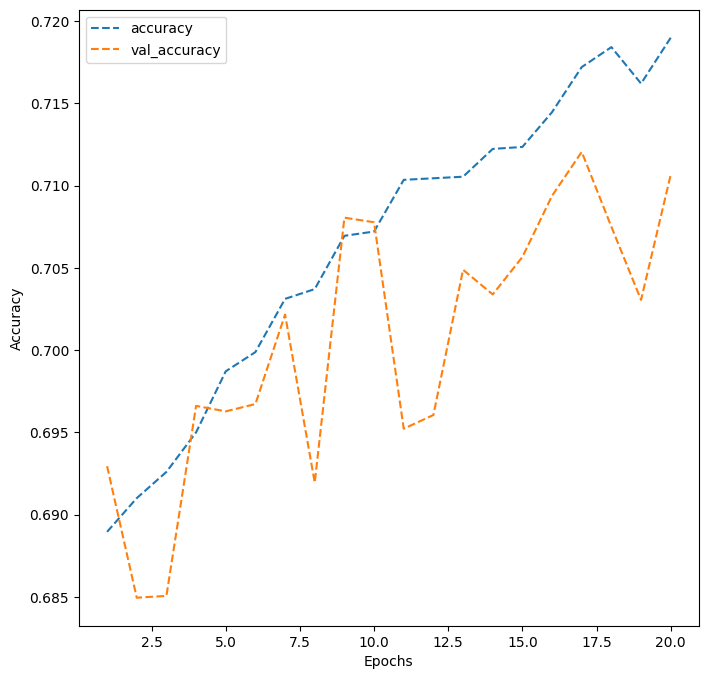

In [ ]:

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

The model does not perform well; the accuracy in the training data increases with the number of epochs performed, achieving values of 70%. However the accuracy on the testing data is much lower, showing a problem of underfitting, which means that we should improve the model.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Define the model

def nn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Dense(256,input_shape=(1024, ), activation = 'relu'))

    model.add(Dense(128, activation = 'relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64, activation = 'relu'))

    model.add(Dense(64, activation = 'relu'))

    model.add(Dense(32, activation = 'relu'))

    #batch normalization
    model.add(BatchNormalization())

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = Adam(learning_rate=0.0005),
                  metrics = ['accuracy'])

    return model

In [ ]:
model_2 = nn_model_2()

In [ ]:
history_model_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128, verbose = 1)

Epoch 1/30
329/329 [==============================] - 7s 17ms/step - loss: 2.3317 - accuracy: 0.1027 - val_loss: 2.3074 - val_accuracy: 0.1011
Epoch 2/30
329/329 [==============================] - 4s 13ms/step - loss: 2.0864 - accuracy: 0.2152 - val_loss: 1.9167 - val_accuracy: 0.3016
Epoch 3/30
329/329 [==============================] - 4s 13ms/step - loss: 1.5672 - accuracy: 0.4620 - val_loss: 1.3665 - val_accuracy: 0.5614
Epoch 4/30
329/329 [==============================] - 6s 17ms/step - loss: 1.2595 - accuracy: 0.5934 - val_loss: 1.1444 - val_accuracy: 0.6345
Epoch 5/30
329/329 [==============================] - 4s 13ms/step - loss: 1.1363 - accuracy: 0.6362 - val_loss: 1.0647 - val_accuracy: 0.6554
Epoch 6/30
329/329 [==============================] - 4s 13ms/step - loss: 1.0537 - accuracy: 0.6649 - val_loss: 1.0315 - val_accuracy: 0.6698
Epoch 7/30
329/329 [==============================] - 6s 17ms/step - loss: 1.0120 - accuracy: 0.6773 - val_loss: 0.9675 - val_accuracy: 0.6955

### **Plot the Training and Validation Accuracies and write down your Observations.**

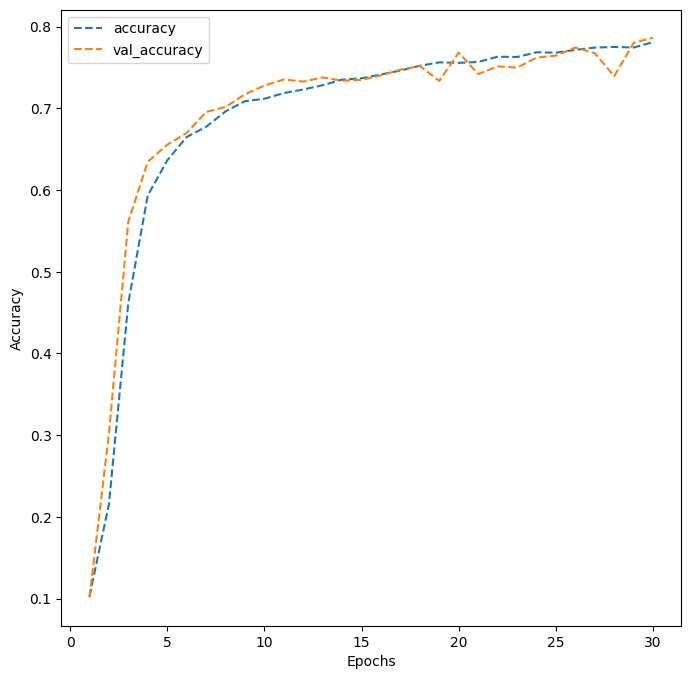

In [ ]:
dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

This model achieved a better accuracy (70% to 80%) than model 1, especially after 10 epochs; there is no under- or overfitting as the plots from the training and testing data run alomost parallel.

**Observations:_______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 3s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

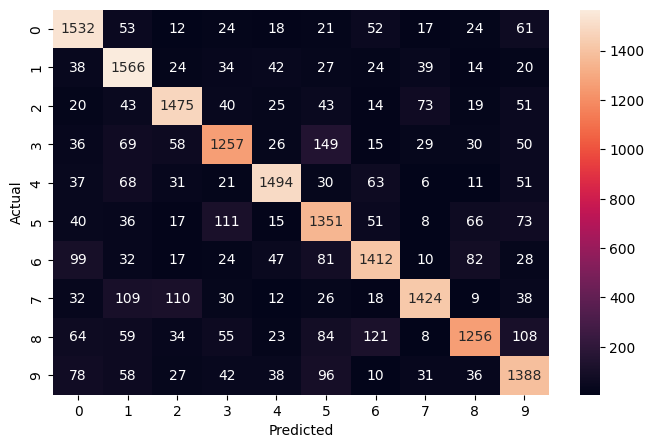

In [ ]:
#confusion matrix using actual labels (y_test) and predicted labels (test_pred)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix([int(x) for x in y_test], test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1814
           1       0.75      0.86      0.80      1828
           2       0.82      0.82      0.82      1803
           3       0.77      0.73      0.75      1719
           4       0.86      0.82      0.84      1812
           5       0.71      0.76      0.74      1768
           6       0.79      0.77      0.78      1832
           7       0.87      0.79      0.82      1808
           8       0.81      0.69      0.75      1812
           9       0.74      0.77      0.76      1804

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



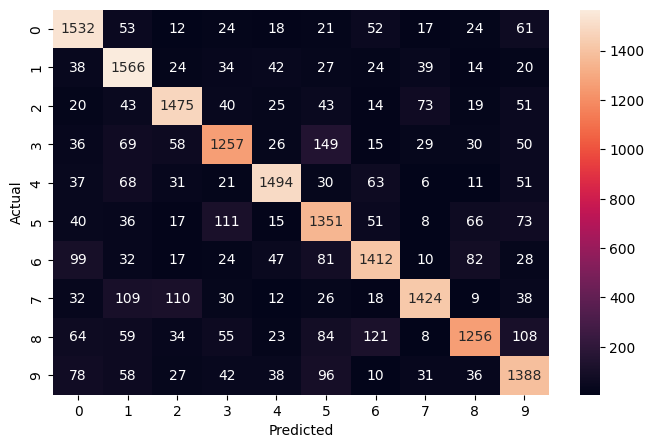

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix([int(x) for x in y_test], test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

The quality of the model improved, comparing with the initial model, as the accuracy,precision, recall and f1 are all above 78%.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
import h5py

h5f = h5py.File('/content/drive/MyDrive/MIT-AI course/elective_project/SVHN_single_grey1.h5')



# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

# Close this file

h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)



```
# This is formatted as code
```

**Observation:**
There are 42000 images in the training dataset and 18000 images in the testing dataset

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#shape and the array of pixels for the first image in the training dataset

print("Shape:",X_train[0].shape)
print("First image array:\n", X_train[0])




Shape: (32, 32)
First image array:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
#Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0],32,32,1)
X_test = X_test.reshape(X_test.shape[0],32,32,1)

Normalize inputs from 0-255 to 0-1

In [ ]:
#Normalize the train and the test dataset

X_train = X_train/255
X_test = X_test/255

Print New shape of Training and Test

In [ ]:
#Print the new shapes of the train and the test dataset

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
#One-hot encode the target variable

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators (same seed)

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def cnn_model_1():

    model = Sequential()

    # Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    # Adding LeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding a second  convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    # Adding another LeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding max pooling to reduce the size of output of second convolutional layer
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Add a dense layer with 32 nodes
    model.add(Dense(32))

    # Adding aLeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding a final output layer with 10 classes
    model.add(Dense(10, activation = 'softmax'))

    # Compile the model
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = Adam(learning_rate=0.001),
                  metrics = ['accuracy'])

    return model

### **Plot the Training and Validation Accuracies and Write your observations.**

In [ ]:
# Build the model

model_1 = cnn_model_1()

In [ ]:
history_model_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose = 1)

Epoch 1/20
1313/1313 [==============================] - 102s 75ms/step - loss: 1.1056 - accuracy: 0.6361 - val_loss: 0.6162 - val_accuracy: 0.8242
Epoch 2/20
1313/1313 [==============================] - 107s 81ms/step - loss: 0.5417 - accuracy: 0.8424 - val_loss: 0.5473 - val_accuracy: 0.8466
Epoch 3/20
1313/1313 [==============================] - 95s 72ms/step - loss: 0.4605 - accuracy: 0.8670 - val_loss: 0.5111 - val_accuracy: 0.8577
Epoch 4/20
1313/1313 [==============================] - 93s 71ms/step - loss: 0.4077 - accuracy: 0.8801 - val_loss: 0.4663 - val_accuracy: 0.8671
Epoch 5/20
1313/1313 [==============================] - 95s 72ms/step - loss: 0.3655 - accuracy: 0.8920 - val_loss: 0.4659 - val_accuracy: 0.8680
Epoch 6/20
1313/1313 [==============================] - 93s 71ms/step - loss: 0.3367 - accuracy: 0.9003 - val_loss: 0.4342 - val_accuracy: 0.8781
Epoch 7/20
1313/1313 [==============================] - 94s 71ms/step - loss: 0.3024 - accuracy: 0.9097 - val_loss: 0.4429

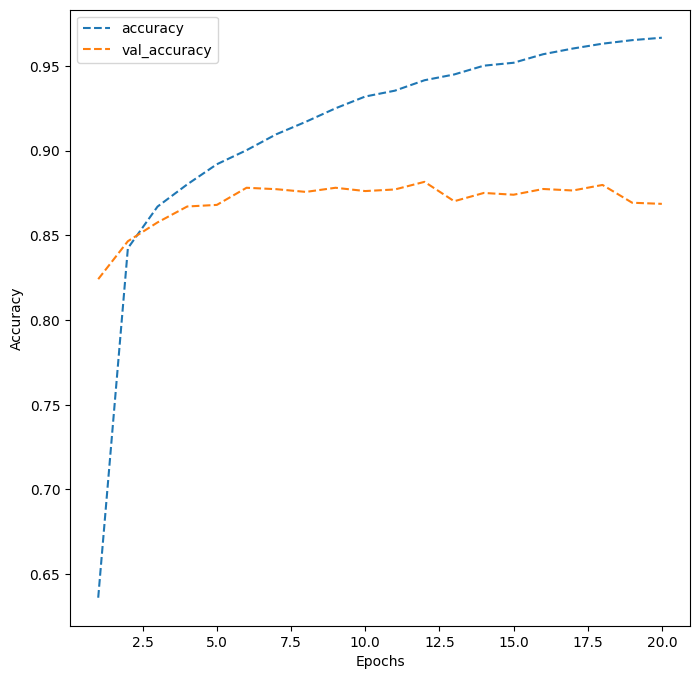

In [ ]:
dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

The model has reasonable accuracy with 3 epochs, achieving an accuracy of 85%; after three iterations there is a clear underfitting, with a large gap between the accuracy on the training data and the testing data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model

def cnn_model_2():

    model = Sequential()

    # Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    # Adding LeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding a second  convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    # Adding another LeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding max pooling to reduce the size of output of second convolutional layer
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # BatchNormalization layer
    model.add(BatchNormalization(axis=-1))

    # Adding a third  convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    # Adding another LeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding a fourth convolutional layer with 64 filters and the kernel size of 3x3, and 'same' padding
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

    # Adding another LeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    # Adding max pooling to reduce the size of output of fourth convolutional layer
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # BatchNormalization layer
    model.add(BatchNormalization(axis=-1))

    # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Add a dense layer with 32 nodes
    model.add(Dense(32))

    # Adding aLeakyRelu activation function with a negative slope of 0.1
    model.add(LeakyReLU(0.1))

    #Adding dropout to randomly switch off 50% of the network to reduce overfitting
    model.add(Dropout(0.5))


    # Adding a final output layer with 10 classes
    model.add(Dense(10, activation = 'softmax'))

    # Compile the model
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = Adam(learning_rate=0.001),
                  metrics = ['accuracy'])

    return model

In [ ]:
model_2 = cnn_model_2()



In [ ]:
history_model_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128, verbose = 1)

Epoch 1/30
329/329 [==============================] - 200s 603ms/step - loss: 1.1681 - accuracy: 0.6142 - val_loss: 1.3738 - val_accuracy: 0.5363
Epoch 2/30
329/329 [==============================] - 206s 627ms/step - loss: 0.6130 - accuracy: 0.8149 - val_loss: 0.4582 - val_accuracy: 0.8663
Epoch 3/30
329/329 [==============================] - 200s 609ms/step - loss: 0.5035 - accuracy: 0.8455 - val_loss: 0.4092 - val_accuracy: 0.8796
Epoch 4/30
329/329 [==============================] - 200s 609ms/step - loss: 0.4444 - accuracy: 0.8669 - val_loss: 0.3629 - val_accuracy: 0.8952
Epoch 5/30
329/329 [==============================] - 199s 605ms/step - loss: 0.4053 - accuracy: 0.8799 - val_loss: 0.3649 - val_accuracy: 0.8961
Epoch 6/30
329/329 [==============================] - 200s 608ms/step - loss: 0.3764 - accuracy: 0.8864 - val_loss: 0.3671 - val_accuracy: 0.8943
Epoch 7/30
329/329 [==============================] - 201s 613ms/step - loss: 0.3539 - accuracy: 0.8941 - val_loss: 0.3481 -

### **Plot the Training and Validation accuracies and write your observations.**

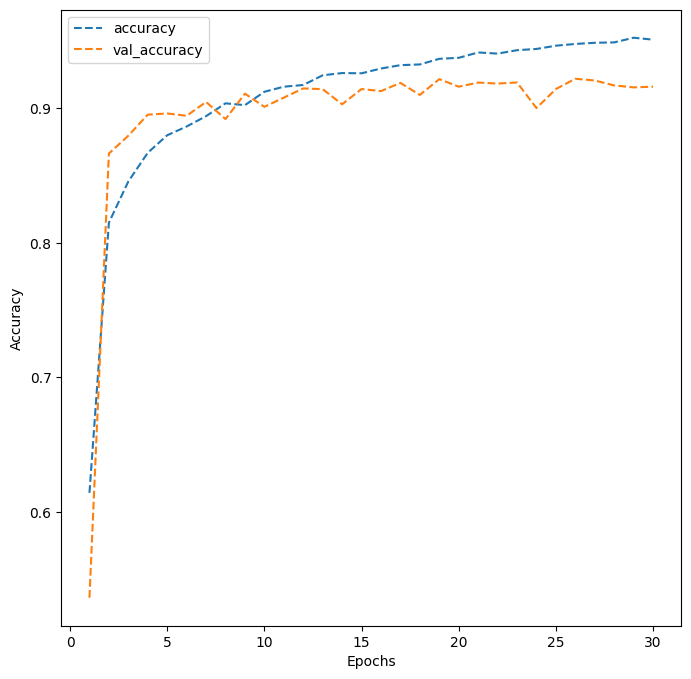

In [ ]:
dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

The model training accuracy is slightly higher than the validation accuracy.
The validation accuracy has improved in comparison to the previous model.
This is the best model, achieving the best results after +/- 10 epochs, with accuracy around 90%.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 22s 39ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

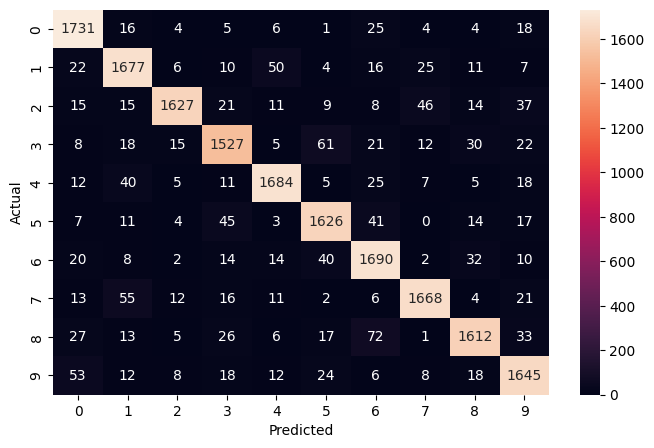

In [ ]:
#confusion matrix using actual labels (y_test) and predicted labels (test_pred)

cm = confusion_matrix([int(x) for x in y_test], test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1814
           1       0.90      0.92      0.91      1828
           2       0.96      0.90      0.93      1803
           3       0.90      0.89      0.90      1719
           4       0.93      0.93      0.93      1812
           5       0.91      0.92      0.91      1768
           6       0.88      0.92      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.92      0.89      0.91      1812
           9       0.90      0.91      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



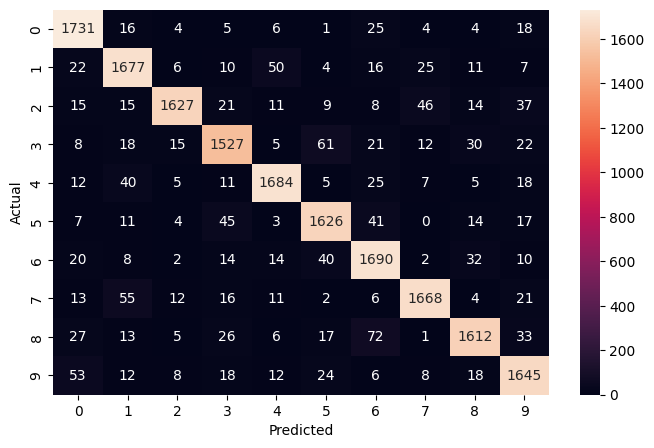

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix([int(x) for x in y_test], test_pred)     #Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

### **Write your final observations on the performance of the model on the test data.**

In [ ]:
The last CNN model have a high accuracy in predicting the numbers from street-level photos. This model presents high valies for all important metrics: accuracy, recall, precision and f1-score.

**Final Observations:_________**